In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importing EMPLOYEE PROMOTION STARTUP CASE STUDY DATA
df=pd.read_csv('/content/employee_promotion.csv')
df
# In this data we want to predict whether the employee got promoted or not ?

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [30]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [31]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


In [32]:
# shape of the data
df.shape

(54808, 13)

In [33]:
# size of the data
df.size

712504

In [34]:
#Cleaning and Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [35]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [36]:
df.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [37]:
df.corr(numeric_only=True)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000661,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.044430,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.049500,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075474,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.039381,-0.010670
awards_won,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.073963,0.195871
avg_training_score,-0.000661,0.044430,-0.049500,0.075474,-0.039381,0.073963,1.000000,0.184386
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.184386,1.000000


In [38]:
# df.interpolate(inplace=True)
# This code uses the interpolate() method
#  in Pandas to fill missing values (NaN) in your DataFrame df using interpolation.

In [39]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [40]:
df.dropna(inplace=True)



In [41]:
df.isnull().sum()
df['education'].value_counts(),df['awards_won'].value_counts()


(education
 Bachelor's          31767
 Master's & above    14194
 Below Secondary       419
 Name: count, dtype: int64,
 awards_won
 0    45290
 1     1090
 Name: count, dtype: int64)

In [42]:
# Education status - Awards won
# plt.pie(df['education'].value_counts(), labels=df['awards_won'].value_counts().index, autopct='%1.1f%%')
# plt.title(x='Education Status')

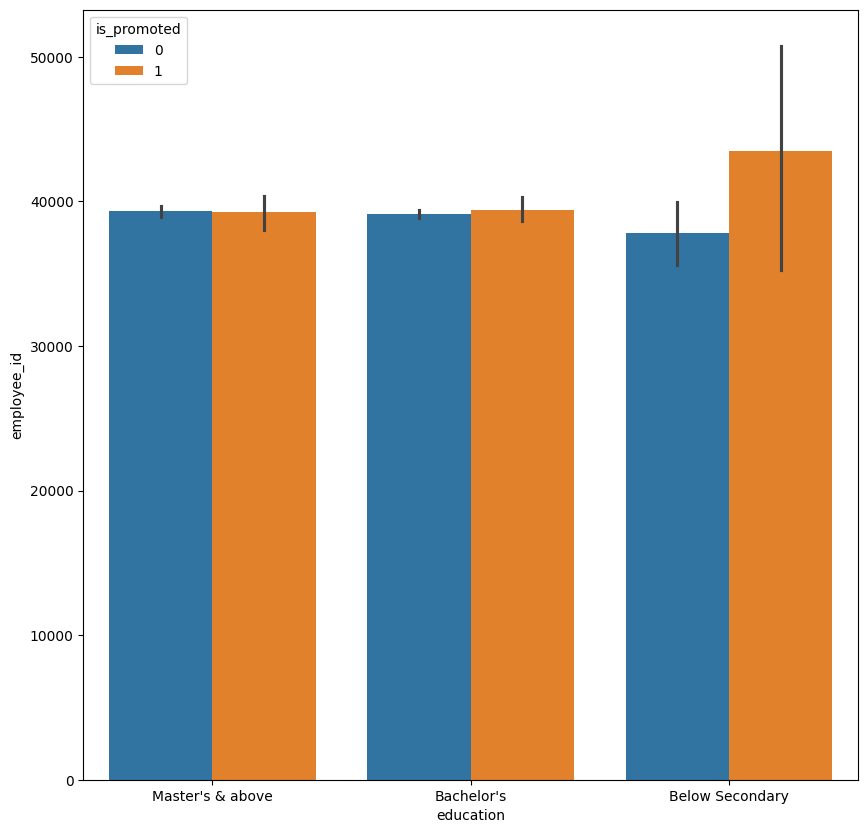

In [43]:

# Number of employess and their education status - Promotion
plt.figure(figsize=(10,10))
sns.barplot(x='education',y='employee_id',hue='is_promoted',data=df)
plt.show()



<Axes: xlabel='gender', ylabel='count'>

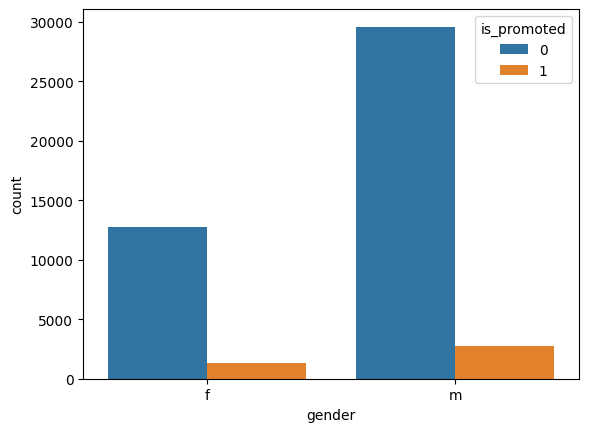

In [44]:
# gender count
sns.countplot(x='gender',hue='is_promoted',data=df)

In [45]:
# Unique values in the data
df.columns
col=['department', 'region', 'education', 'gender',
       'recruitment_channel']
for i in col:
  print(i)
  print(df[i].unique())
  print(df[i].nunique())



department
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
9
region
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_32' 'region_6' 'region_33' 'region_8'
 'region_24' 'region_3' 'region_9' 'region_18']
34
education
["Master's & above" "Bachelor's" 'Below Secondary']
3
gender
['f' 'm']
2
recruitment_channel
['sourcing' 'other' 'referred']
3


In [46]:
# Correlation of the Data
df.corr(numeric_only=True)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.006454,0.000129,0.004044,0.002470,0.008180,0.001035,0.002453
no_of_trainings,-0.006454,1.000000,-0.084901,-0.064414,-0.056410,-0.009460,0.043313,-0.025955
age,0.000129,-0.084901,1.000000,0.004825,0.620466,-0.012328,-0.067184,-0.024067
previous_year_rating,0.004044,-0.064414,0.004825,1.000000,-0.000133,0.029480,0.070655,0.160455
length_of_service,0.002470,-0.056410,0.620466,-0.000133,1.000000,-0.043478,-0.048476,-0.015027
awards_won,0.008180,-0.009460,-0.012328,0.029480,-0.043478,1.000000,0.074569,0.199343
avg_training_score,0.001035,0.043313,-0.067184,0.070655,-0.048476,0.074569,1.000000,0.182750
is_promoted,0.002453,-0.025955,-0.024067,0.160455,-0.015027,0.199343,0.182750,1.000000


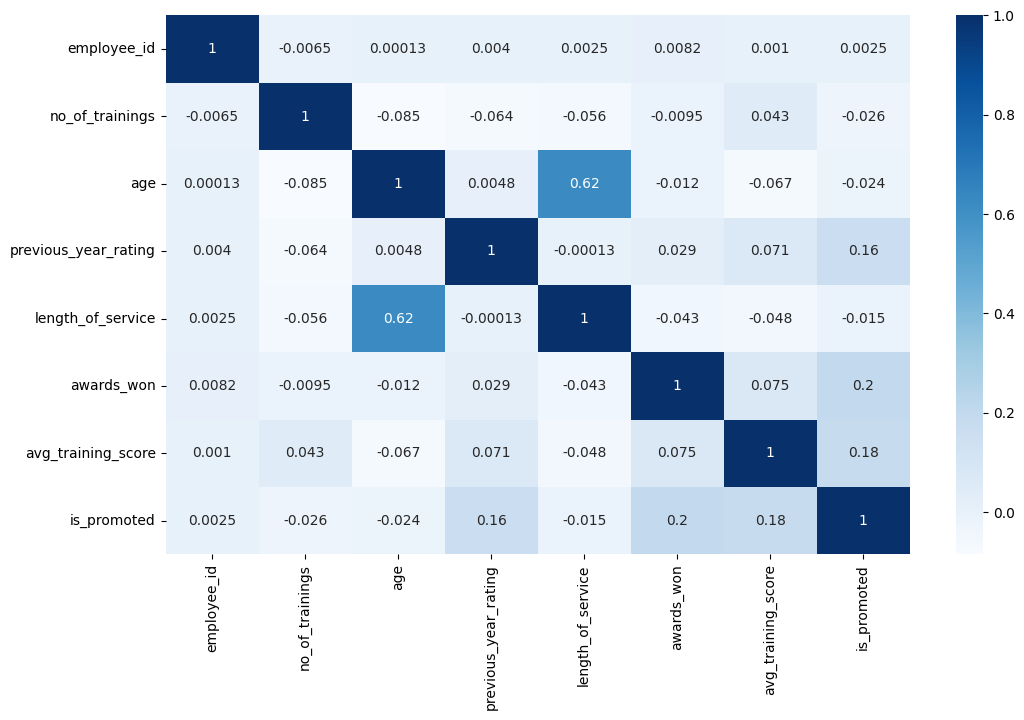

In [47]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')
plt.show()

In [48]:
# Prediction :
df.drop('employee_id',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)

In [49]:
df.dtypes

,0
department,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
awards_won,int64
avg_training_score,float64


In [50]:

# Using LabelEncoder To transform the data


from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])
df


,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,2,0,2,1,35,5.0,8,0,49.0,0
1,4,0,1,0,1,30,5.0,4,0,60.0,0
2,7,0,1,2,1,34,3.0,7,0,50.0,0
3,7,0,1,0,2,39,1.0,10,0,50.0,0
4,8,0,1,0,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...
54802,7,0,1,0,2,31,1.0,2,0,49.0,0
54803,8,0,1,2,1,48,3.0,17,0,78.0,0
54804,4,2,0,0,1,37,2.0,6,0,56.0,0
54805,0,0,1,0,1,27,5.0,3,0,79.0,0


In [51]:
# Splitting the data for training and testing


x=df.drop('is_promoted',axis=1).values
y=df['is_promoted'].values



In [52]:
# splitting in to training and testing data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)



In [53]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)
xtrain,xtest

(array([[0.875     , 0.        , 1.        , ..., 0.16666667, 0.        ,
         0.11666667],
        [0.5       , 1.        , 1.        , ..., 0.13888889, 0.        ,
         0.35      ],
        [0.        , 0.        , 1.        , ..., 0.05555556, 0.        ,
         0.76666667],
        ...,
        [0.875     , 0.        , 1.        , ..., 0.08333333, 0.        ,
         0.13333333],
        [0.875     , 0.        , 1.        , ..., 0.16666667, 0.        ,
         0.13333333],
        [0.5       , 0.        , 0.        , ..., 0.02777778, 0.        ,
         0.4       ]]),
 array([[0.        , 0.        , 1.        , ..., 0.12121212, 0.        ,
         0.72881356],
        [0.625     , 0.        , 1.        , ..., 0.21212121, 0.        ,
         0.52542373],
        [0.875     , 0.        , 1.        , ..., 0.06060606, 0.        ,
         0.18644068],
        ...,
        [1.        , 0.        , 1.        , ..., 0.21212121, 0.        ,
         0.6779661 ],
        [0.3

DecisionTreeClassifier() is the model
****************************************************************************************************
[[11747   967]
 [  700   500]]
0.8801926117579416
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     12714
           1       0.34      0.42      0.37      1200

    accuracy                           0.88     13914
   macro avg       0.64      0.67      0.65     13914
weighted avg       0.89      0.88      0.89     13914

RandomForestClassifier() is the model
****************************************************************************************************
[[12565   149]
 [  821   379]]
0.9302860428345551
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     12714
           1       0.72      0.32      0.44      1200

    accuracy                           0.93     13914
   macro avg       0.83      0.65      0.70     13914
weighted avg       0.92

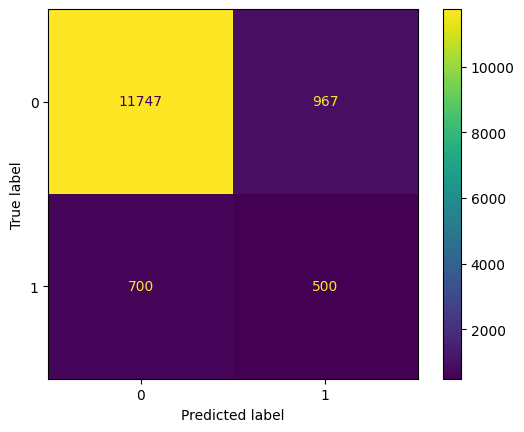

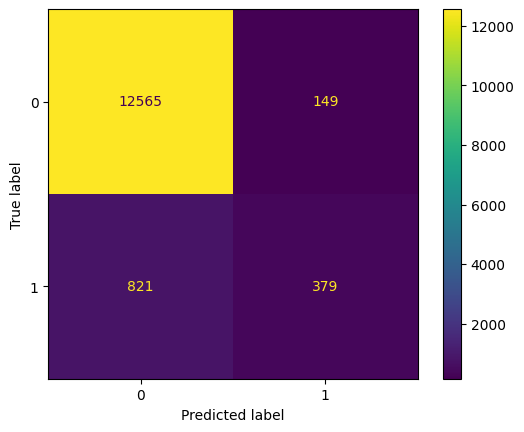

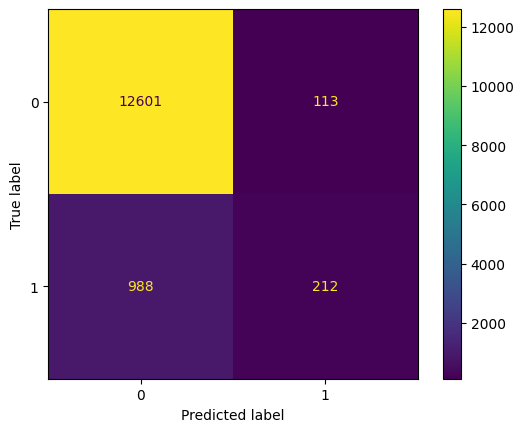

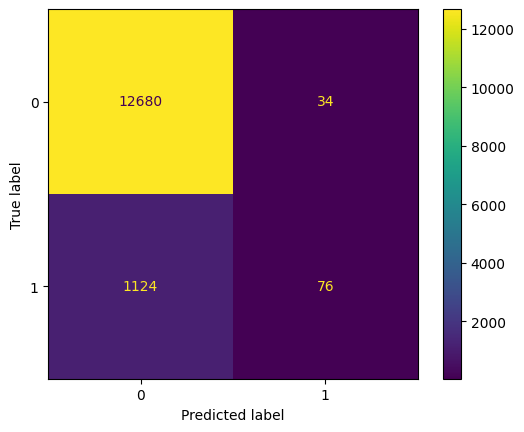

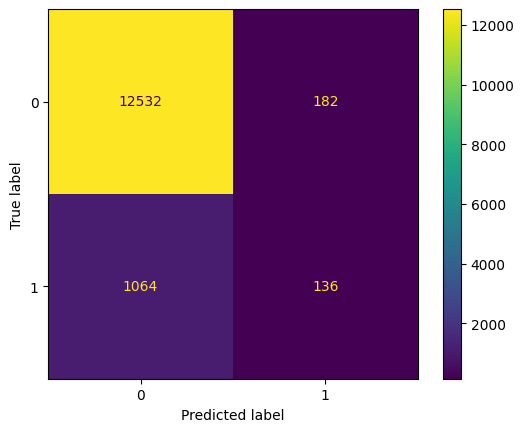

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
# regression-DecisionTreeregressor
for i in [DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]:
  print(f'{i} is the model')
  print('*'*100)
  i.fit(xtrain,ytrain)
  y_predict=i.predict(xtest)
  y_predict
  cm=confusion_matrix(ytest,y_predict)
  print(cm)
  lab=[0,1]
  cmd=ConfusionMatrixDisplay(cm,display_labels=lab)
  cmd.plot()

  print(accuracy_score(ytest,y_predict))
  print(classification_report(ytest,y_predict))